In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [3]:
df_rf = pd.read_csv("df_alpine_lsa.csv")

In [4]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Alpha-Pinene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.106952
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.106952
2,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.106952
3,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.106952
4,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.106952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42967,0.175310,0.233013,0.002148,0.114778,0.056574,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.021390
59996,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.021390
59997,42971,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.021390
59998,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.021390


In [5]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [6]:
X = df_rf.drop(['index', 'X..Alpha-Pinene'], axis = 1)
y = df_rf[['X..Alpha-Pinene']]

Plotting histograms on target variable

In [7]:
y_array = y.to_numpy()
y_array

array([[0.10695187],
       [0.10695187],
       [0.10695187],
       ...,
       [0.02139037],
       [0.02139037],
       [0.02139037]])

<Axes: ylabel='Count'>

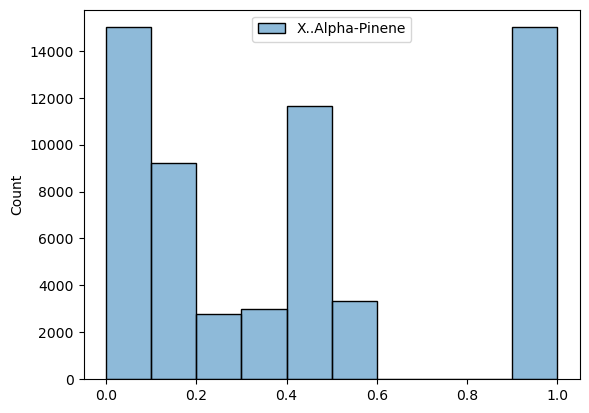

In [8]:
sns.histplot(y, bins = 10)

Train test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [10]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [11]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1382/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [12]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [13]:
mean_absolute_error(y_val, y_pred_rfreg)

0.02448180215376204

In [14]:
mean_squared_error(y_val, y_pred_rfreg)

0.00332568634393202

In [15]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.05766876402292683

In [16]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9915506933609203

In [17]:
#val
r2_score(y_val, y_pred_rfreg)

0.9752897893554521

Residual plots for each target variable

Feature Selection

In [18]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [19]:
df_feat

,features,score
0,lsa_0,0.071289
1,lsa_1,0.044516
2,lsa_2,0.054855
3,lsa_3,0.072052
4,lsa_4,0.065182
...,...,...
81,tree,0.000642
82,tropical,0.000294
83,vanilla,0.001202
84,violet,0.000049


In [20]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [21]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
6,indica,3.636332e-01
60,mango,9.645724e-02
3,lsa_3,7.205213e-02
0,lsa_0,7.128935e-02
4,lsa_4,6.518233e-02
2,lsa_2,5.485501e-02
1,lsa_1,4.451628e-02
43,blueberry,3.581766e-02
51,earthy,3.498308e-02
26,hungry,1.822374e-02


In [22]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [23]:
selector.estimator_.feature_importances_

array([7.34316900e-02, 4.61718689e-02, 5.45616772e-02, 7.06518839e-02,
       6.45665436e-02, 3.00941976e-03, 3.63024193e-01, 4.46577213e-03,
       3.59452520e-06, 8.28890172e-04, 7.74177791e-03, 6.14550505e-08,
       7.86019560e-03, 6.02819148e-06, 1.62778354e-03, 1.95328627e-03,
       5.63004220e-03, 1.28018013e-03, 6.57434597e-08, 1.06027240e-02,
       3.79315220e-08, 3.70310912e-08, 4.04559236e-03, 3.44544341e-03,
       7.22852656e-03, 2.45381383e-04, 1.80605187e-02, 5.20698551e-06,
       5.79051396e-08, 1.40595763e-03, 1.71353093e-02, 8.17867603e-08,
       2.85667796e-03, 3.97942437e-08, 4.65230178e-09, 6.00452877e-03,
       4.42881978e-03, 1.73250897e-03, 1.76897275e-04, 2.29419061e-05,
       2.29201537e-04, 6.86916341e-03, 4.15629206e-05, 3.58919073e-02,
       1.45386887e-04, 1.54039159e-03, 2.18030497e-04, 8.10168276e-05,
       1.37317878e-03, 7.27765427e-04, 3.84100007e-03, 3.50604015e-02,
       8.51806383e-04, 5.82847271e-04, 1.52202675e-03, 1.46890387e-04,
      

In [24]:
selector.threshold_

0.011627906976744186

In [25]:
mask = selector.get_support()

In [26]:
mask

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [27]:
selected_features = X.columns[mask]

In [28]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,indica,hungry,relaxed,blueberry,earthy,mango
0,0.341025,0.182753,0.008214,0.140406,-0.156943,0,1,1,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,0,1,1,0,0,0
2,0.232158,-0.045496,0.187131,-0.000936,0.018518,0,0,1,0,0,0
3,0.261225,0.100324,-0.043622,0.141860,-0.034786,0,1,0,0,0,0
4,0.243491,0.034313,0.080290,-0.165609,0.019773,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
59995,0.175310,0.233013,0.002148,0.114778,0.056574,1,0,1,0,0,0
59996,0.440634,-0.078839,0.085152,0.087878,-0.133604,1,0,0,0,0,0
59997,0.184573,-0.137296,-0.095301,0.181735,-0.042683,1,0,0,0,0,0
59998,0.055494,0.003622,-0.050252,-0.024795,-0.031141,1,0,0,0,0,0


Train test split (after Feature Selection)

In [29]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_alpine.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_alpine.pkl")

['selected_X_rf_lsa_elbow_alpine.pkl']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [31]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [32]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1382/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [33]:
mean_absolute_error(y_val, y_pred_rfreg)

0.029191682660715312

In [34]:
mean_squared_error(y_val, y_pred_rfreg)

0.004435512220592125

In [35]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.0665996412947707

In [36]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9854461953080846

In [37]:
#val
r2_score(y_val, y_pred_rfreg)

0.9669224363357696

Hyperparameter Tuning

In [38]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [39]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [40]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_valida

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [41]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50}

In [42]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_alpine.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_alpine.pkl")

['rscv_rf_lsa_elbow_best_params_alpine.pkl']

RF (after Hyperparameter Tuning)

In [43]:
rfreg_ht = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, max_features = 'auto', min_samples_leaf = 2, max_depth = 50)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1382/156118646.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [44]:
mean_absolute_error(y_val, y_pred_rfreg)

0.03186574526052423

In [45]:
mean_squared_error(y_val, y_pred_rfreg)

0.004769232517265685

In [46]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.06905963015587098

In [47]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9823745211771984

In [48]:
#val
r2_score(y_val, y_pred_rfreg)

0.9644337374414191

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [49]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [50]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_alpine.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_alpine.pkl")

['y_test_rfreg_lsa_elbow_alpine.pkl']

In [51]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.032490667123283065

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.004678159228980688

In [53]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.06839707032454452

In [54]:
r2_score(y_test, y_pred_rfreg_test)

0.9650128991594575

Error analysis

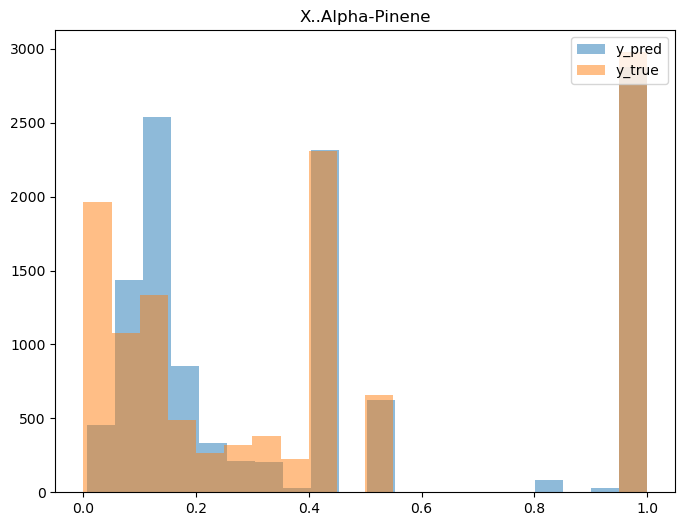

<Figure size 640x480 with 0 Axes>

In [55]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Pinene"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_alpine.png')

Pearson R

In [56]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.983
P-value: 0.000


<Axes: >

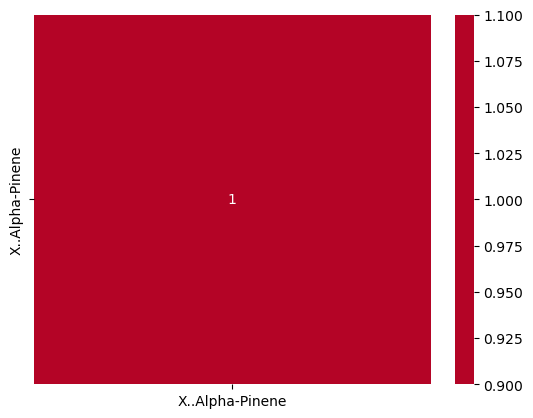

In [57]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)